#### DS 3000 - Assignment 11
#### Student Name: Nafisa Tasnia
### Date: 12/2/2024
Submission Instructions
Submit this ipynb file to canvas.
The ipynb format stores outputs from the last time you ran the notebook. (When you open a notebook it has the figures and outputs of the last time you ran it too). To ensure that your submitted ipynb file represents your latest code, make sure to give a fresh run Kernel > Restart & Run All just before uploading the ipynb file to Canvas.
Academic Integrity
Writing your homework is an individual effort. You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years. Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.
Don't forget to cite websites which helped you solve a problem in a unique way. You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.
Documentation / style counts for credit Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article How to Write Beautiful Python Code With PEP 8 or ask your TA's for tips.
NOTE: Write python expressions to answer ALL questions below and ensure that you use the print() function to display the output. Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

## Question 1:
(5 pts) Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.

In [81]:
# reads data
diabetes = pd.read_csv("diabetes.csv")

In [82]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Looking at the data, I can see that the maximum Blood Pressure level is 122. This means in this dataset, the highest blood pressure of a patient is 122. The maximum for glucose is 199, meaning in the dataset, the highest glucose level of a patient is 199. The maximum skin thickness is 99, meaning the thickest skin that a patient can have in this dataset is 99. The maximum insulin is 846, meaning the highest insulin level a patient in this dataset can have is 846. The highest BMI in this dataset is 67, which is indicated by the max. The maximum pregnancy count in this dataset is 17. This means in the dataset the most amount of pregenancy is 17. Looking at the diabetes pedigree function, which tells us the heredity risk of diabetes, shows us that the maximum score observed in this category is 2.42. The maximum age is 81, meaning the oldest patients in this data set will be 81 years old.
The minimum pregnancy a patient can have is 0. So this means a patient might not be pregnant at all. The minimum for glucose, blood pressure, skin thickness, insulin, and BMI are all 0, which is unrealistic because these measures in reality are expected to be non-zero values. Looking at the age, we can see that the minimum age in this dataset is 21. So the youngest patient in the dataset will be the age of 21. The diabetes pedigree function, which tells us the hereditary risk of diabetes, shows that the minimum value is 0.07800. So in this dataset, the lowest score for the diabetes pedigree function observed is 0.07800.

In [83]:
# This tells us there is 768 rows with 9 columns
print("Dimensions of the dataset:", diabetes.shape)

Dimensions of the dataset: (768, 9)


In [84]:
print(diabetes.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


## Question 2:
Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.


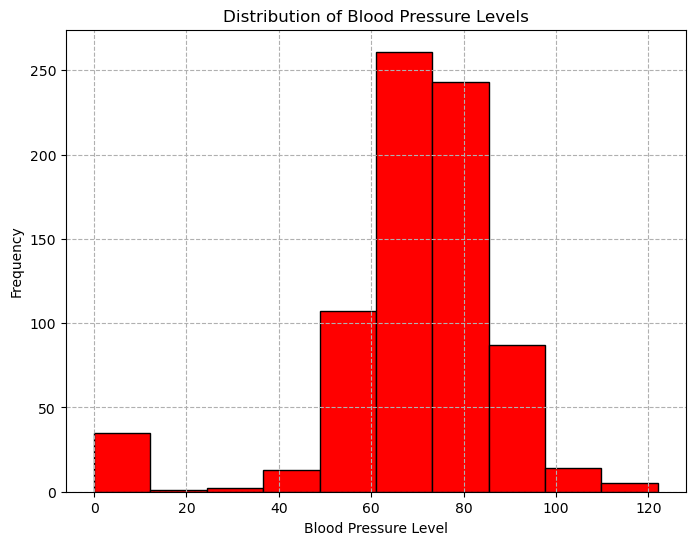

In [85]:
# Displays histogram of Blood Pressure Levels 
plt.figure(figsize=(8,6))
plt.hist(diabetes["BloodPressure"], color="red", edgecolor="black")
plt.title("Distribution of Blood Pressure Levels")
plt.ylabel("Frequency")
plt.xlabel("Blood Pressure Level")
plt.grid(linestyle="--")

This graph shows how blood pressure level from 60 through 80 is the most frequent amongst the patients in this data set. As we look to the right, it is still prevalent but less common for patient blood pressure to be greater than 100. Then looking at the left, we can see that there are a lot of patients whose blood pressure is 0 to around 15. However, having blood pressure around this number is unlikely as this number is extremely low and not compatible with life.

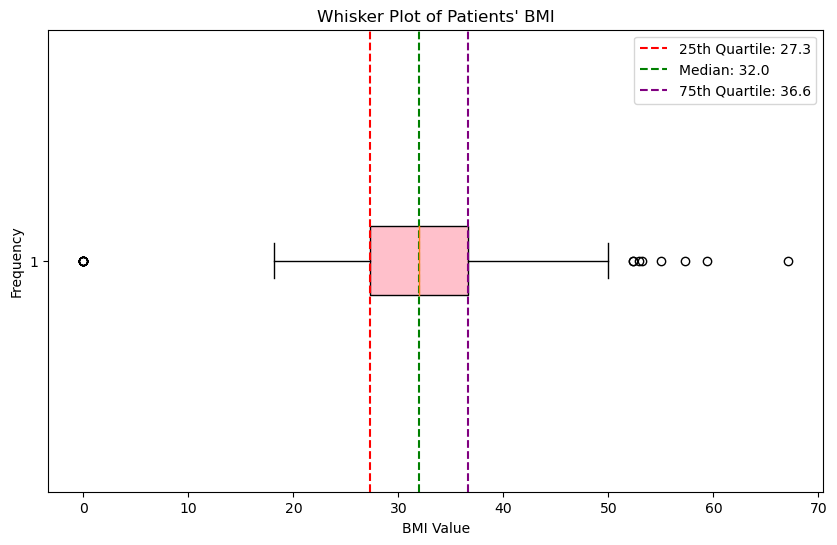

In [86]:
# Calculate quartiles for BMI
quartiles = diabetes["BMI"].quantile([0.25, 0.5, 0.75])

# Create box plot for BMI data with quartiles
plt.figure(figsize=(10, 6))
plt.boxplot(diabetes["BMI"], vert=False, patch_artist=True, boxprops=dict(facecolor='pink'))
plt.axvline(x=quartiles[0.25], color='red', linestyle='--', label=f'25th Quartile: {quartiles[0.25]}')
plt.axvline(x=quartiles[0.5], color='green', linestyle='--', label=f'Median: {quartiles[0.5]}')
plt.axvline(x=quartiles[0.75], color='purple', linestyle='--', label=f'75th Quartile: {quartiles[0.75]}')
plt.xlabel('BMI Value')
plt.ylabel('Frequency')
plt.title('Whisker Plot of Patients\' BMI')
plt.legend()
plt.show()


Looking at the BMI whisker plot, we can see that 25% of the BMI of the patients fall below 27.3 in this dataset. Then the median was 32, meaning the middle value of the BMI in this dataset for the patients is 32. Finally, the third quartile was 36.6, meaning 75% of the BMI of the patients fall below 36.6. Taking another look, we can see that the median is closer to Q1 than Q3, meaning that the BMI distribution is slightly skewed towards lower BMI for patients. Then taking a look to the right, we can see that there are some outliers with BMI closer to the 50s, 60s, and 70s but very few. The outliers are less. Then looking to the left, we can see that there are some points towards the 0 which seems to show an error in the dataset as humans can't have 0 for BMI.

## Question 3
Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).

In [87]:
# To see data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
# To see min
diabetes.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

We can see that the minimum for the variables glucose, blood pressure, skin thickness, insulin, and BMI is 0. However, as a living human, having those variables as 0 would be impossible. Thus, we must impute the data to deal with this inaccurate data. Dropping it would make us lose valuable data in such a small dataset.

Seeing that glucose, blood pressure, skin thickness, insulin, and BMI all have 0 as the minimum is impossible since these are all supposed to be non-zero values as it would be impossible for humans to have 0 for these variables. Thus, we need to impute the data to fill them in so we don't lose important data. I chose the median because it isn't affected by outliers.

In [89]:
# Get median for each column
m_g = diabetes["Glucose"].median()
m_bp = diabetes["BloodPressure"].median()
m_st = diabetes["SkinThickness"].median()
m_insulin = diabetes["Insulin"].median()
m_BMI = diabetes["BMI"].mean()
m_dp = diabetes["DiabetesPedigreeFunction"].median()
print(m_g, m_bp, m_st, m_insulin, m_BMI, m_dp)

117.0 72.0 23.0 30.5 31.992578124999998 0.3725


In [90]:
# Fill/replace 0 with the median
diabetes["Glucose"].fillna(m_g, inplace=True)
diabetes["BloodPressure"].fillna(m_bp, inplace=True)
diabetes["SkinThickness"].fillna(m_st, inplace=True)
diabetes["Insulin"].fillna(m_insulin, inplace=True)
diabetes["BMI"].fillna(m_BMI, inplace=True)
diabetes["DiabetesPedigreeFunction"].fillna(m_dp, inplace=True)

In [91]:
# Since Outcome is categorical and not integer feature we must change the data type to reflect this
diabetes["Outcome"] = diabetes["Outcome"].astype("category")

In [92]:
print(diabetes.dtypes)

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object


## QUESTION 4
(10 pts) Partition the data into train/test sets. After which, perform the following: encode any categorical data normalize numeric data.

In [93]:
# Setting up x variables/features that will be used to predict target variable 
X = diabetes.drop(columns=["Outcome"])

#the target variable/ the variable we are predicting 
y = diabetes["Outcome"]

In [94]:
# Spltiting data between test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [95]:
# setting up StandardScaler
scaler = StandardScaler()

# Fit and transform the features in X_train
X_train = scaler.fit_transform(X_train)

# Transform the features in X_test
X_test= scaler.transform(X_test)


## Question 5
Build the model that predicts the target variable. Ensure that you: Instantiate the correct SVM model, train and evaluate it. Use GridSearchCV to tune at least two hyperparameters.** Perform cross validation. **You'll need to read the documentation of the SVM algorithm to identify the hyperparameters. Display: 1) the best model/parameters and 2) the best score that was obtained.

In [96]:
# using svm
svc = SVC()

# fitting training set 
svc.fit(X_train, y_train)

SVC()

In [97]:
# Define the hyperparameters to tune
param_grid =  {'C': np.arange(1,10), 'gamma': np.arange(1,5)}

# Define the SVM model
svc_model = SVC()

# Instantiate GridSearchCV
svc_grid = GridSearchCV(svc_model, param_grid, cv=5, return_train_score=True)

# Fit the GridSearchCV on the training data
svc_grid.fit(X_train, y_train)

# Get the best model and parameters
best_score = svc_grid.best_score_
best_params = svc_grid.best_params_

# Display the results
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 3, 'gamma': 1}
Best Score: 0.703859466943579


In [98]:
# Use the SVM model with the best parameters
best_model = SVC(C=1, gamma=1)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)


In [99]:
# Evaluate the model using the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [100]:
# Display score
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6666666666666666
Precision: 0.574468085106383
Recall: 0.32142857142857145
F1 Score: 0.41221374045801534


This means the model's predictions for the outcome were 66% correct most of the time. Then the precision tells us that 57% of the predicted positive instances were actually positive. Recall tells us that the model identified the actual positive instances of the outcome 32% of the time. The F1 score of 0.41 indicates the overall balance between precision and recall, which was 0.41. While the model had a high score for accuracy and precision, its score for F1 and recall was relatively low. However, looking at it overall, the model did a moderate job of accurately predicting the outcome.

Question 6
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model. Did it accurately predict the target? Do you think the prediction from this model is useful and would you advocate for its use in the medical industry?


In [101]:
# Seeing bias-variance 
cv_results = pd.DataFrame(svc_grid.cv_results_)
cv_results = cv_results.sort_values(by=["mean_test_score"], ascending=False)
cv_results[["mean_train_score", "std_train_score", "mean_test_score", "std_test_score"]].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
8,0.994879,0.001742,0.703859,0.016865
12,0.996276,0.002372,0.702025,0.009038
4,0.991621,0.002370,0.700156,0.024899
16,0.998605,0.001860,0.698304,0.013070
0,0.973462,0.002389,0.696469,0.019951


The mean train score was consistently in the range of 0.99, which indicates that the training data had high performance. Then, the std train score ranged from 0.001742 to 0.002389, meaning there was very little variance around the mean. This suggests that the performance score for the data is consistent throughout every fold, indicating a good model. 

Now looking at the test scores, we can see that the mean test score was between 0.696469 and 0.703859, which still indicates high performance for the testing data. The std test score ranged from 0.009038 to 0.016865, meaning the variance around the test mean was very small, another indication that the model is good. 

Considering that the metrics and this low variance in the test all indicate that the model is moderately to highly accurate, shows that this model is suitable for the medical industry. It isn't fully accurate, but the medical industry can still use it for medical applications.